<a href="https://colab.research.google.com/github/olivia-sp/h2-station-dev/blob/main/station_model_total_EDA_v0_1_olivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import os

if os.path.isfile('/content/content/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv') == True:
  print('already')
else:
  #os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv

% cd /content


[Errno 2] No such file or directory: 'data_set'
/content
--2022-01-18 00:54:21--  https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-01-18 00:54:21 ERROR 404: Not Found.

/content


In [4]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv'



In [5]:
df_raw_data = pd.read_csv(RAW_PATH, index_col=0)
df_raw_data.info()

df_raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77436
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  bool   
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   filename            77222 non-null  object 
 7   precipitation       46123 non-null  float64
 8   total_car_num       77222 non-null  int64  
 9   day_week            77222 non-null  object 
 10  decision_car_num    76980 non-null  object 
 11  humid               46123 non-null  float64
 12  max_car_num         76907 non-null  float64
 13  year                77222 non-null  int64  
 14  month               77222 non-null  int64  
 15  day                 77222 non-null  int64  
 16  hour

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
filename                  0
precipitation         31099
total_car_num             0
day_week                  0
decision_car_num        242
humid                 31099
max_car_num             315
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [6]:
df_raw_data2=df_raw_data.drop(['decision_car_num', 'max_car_num', 'filename'], axis=1)
df_raw_data2.isnull().sum()

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
precipitation         31099
total_car_num             0
day_week                  0
humid                 31099
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [7]:
df_raw_data2.head()

,holiday,weekend,time,precipitation_type,temperature,station_name,precipitation,total_car_num,day_week,humid,year,month,day,hour,minute,second
0,False,False,2020-09-17-21h-20m-28s,0.0,23.0,26,0.0,2,thu,52.0,2020,9,17,21,20,28
1,False,False,2020-09-17-21h-38m-08s,0.0,23.0,26,0.0,3,thu,52.0,2020,9,17,21,38,8
2,False,False,2020-09-18-16h-45m-41s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,45,41
3,False,False,2020-09-18-16h-50m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,50,0
4,False,False,2020-09-18-16h-55m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,55,0


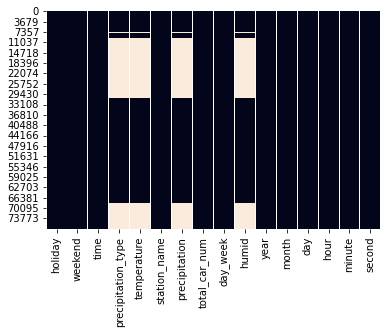

In [8]:
%matplotlib inline
sns.heatmap(df_raw_data2.isnull(), cbar=False)

In [9]:
plt_df_raw_data2 = df_raw_data2.set_index('time')

Data Imputation
1. mean/median : 작은 크기의 숫자형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 범주형 feature 사용 불가, 부정확함
2. most frequent/zero/constant : 범주형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 데이터 bias 생성 가능
3. KNN imputation : feature similarity  이용하여 근접한 데이터 찾음(impyute lib), 데이터셋에 따라 다르나 가장 정확함, 메모리 많이 필요, outlier에 민감
4. MICE : 누락된 데이터 여러번 채우는 방식, 연속형/이진형/범위형 패턴 처리 가능, imputation-analysis(m개의 완성된 데이터 분석)-pooling(평균,분산,신뢰구간 계산하여 합침)
5. 딥러닝 이용 : 범주형/non-numerical 데이터에 매우 효과적, DNN 이용해서 누락 값 유추, 한번에 한 컬럼만 대체 가능, 대규모 데이터셋은 속도가 상당히 느림, 유추할 feature에 대한 정보있는 feature 직접 지정해야 함
6. stochastic regression imputation : 동일 데이터셋의 다른 feature에서 결측값 예측
7. Extrapolation and Interpolation : 이산형 범위 내 데이터로부터 값 추정, interpolation(20살, 40살 데이터로 30살 추측), Extrapolation(1~20 데이터로 10년 후 예측, 안정성 떨어짐)
8. Hot-Deck Imputation : 비슷한 데이터셋에서 랜덤하게 선택


In [10]:
df_null = df_raw_data2[['precipitation','precipitation_type', 'temperature', 'humid']]
df_raw_data3 = df_raw_data2.drop(['precipitation','precipitation_type', 'temperature', 'humid'], axis=1)
df_raw_data3

,holiday,weekend,time,station_name,total_car_num,day_week,year,month,day,hour,minute,second
0,False,False,2020-09-17-21h-20m-28s,26,2,thu,2020,9,17,21,20,28
1,False,False,2020-09-17-21h-38m-08s,26,3,thu,2020,9,17,21,38,8
2,False,False,2020-09-18-16h-45m-41s,26,4,fri,2020,9,18,16,45,41
3,False,False,2020-09-18-16h-50m-00s,26,4,fri,2020,9,18,16,50,0
4,False,False,2020-09-18-16h-55m-00s,26,4,fri,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77432,False,False,2022-01-06-16h-40m-00s,26,3,thu,2022,1,6,16,40,0
77433,False,False,2022-01-06-16h-45m-00s,26,3,thu,2022,1,6,16,45,0
77434,False,False,2022-01-06-16h-50m-00s,26,4,thu,2022,1,6,16,50,0
77435,False,False,2022-01-06-16h-55m-00s,26,2,thu,2022,1,6,16,55,0


fillna(ffill/bfill)

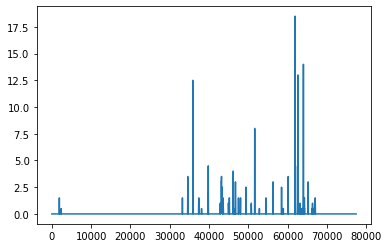

In [33]:
df_ffill = df_null.fillna(method='ffill')
df_ffill['precipitation'].plot()

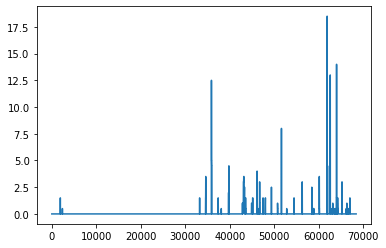

In [34]:
df_bfill = df_null.fillna(method='bfill')
df_bfill['precipitation'].plot()

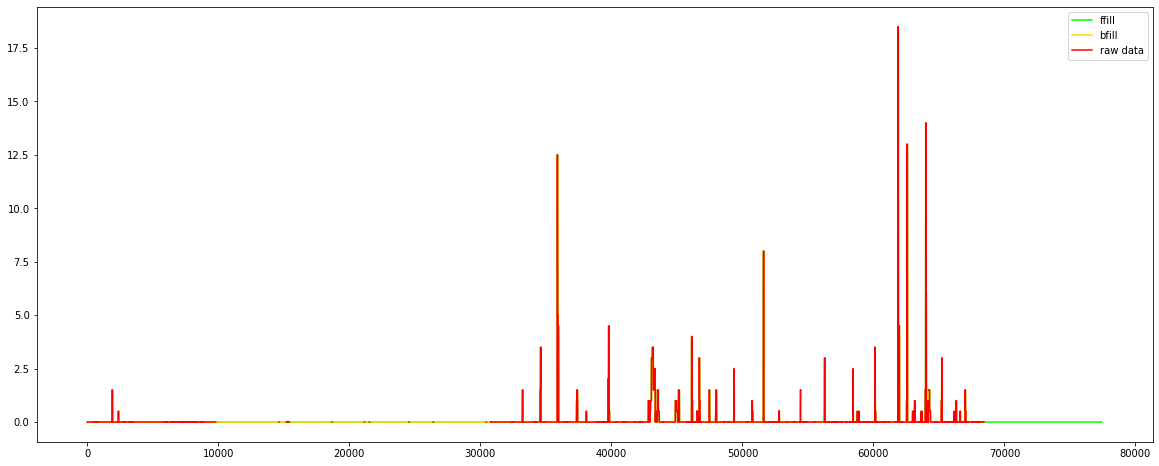

In [41]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)


chart.plot(df_ffill['precipitation'], color='lime' , label='ffill')
chart.plot(df_bfill['precipitation'], color='gold' , label='bfill')
chart.plot(df_raw_data2['precipitation'], color='red' , label='raw data')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

Mean/Median

In [11]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_null)
df_mean = pd.DataFrame(imp_mean.transform(df_null), columns = df_null.columns)

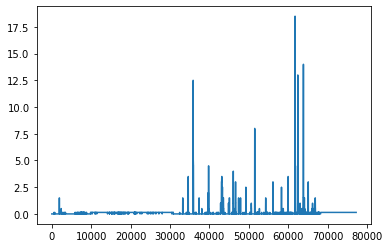

In [12]:
df_mean['precipitation'].plot()

In [13]:
imp_median = SimpleImputer(strategy='median') #'median'을 쓰면 중앙값사용
imp_median.fit(df_null)
df_median = pd.DataFrame(imp_median.transform(df_null), columns = df_null.columns)

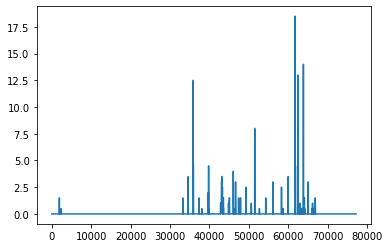

In [14]:
df_median['precipitation'].plot()

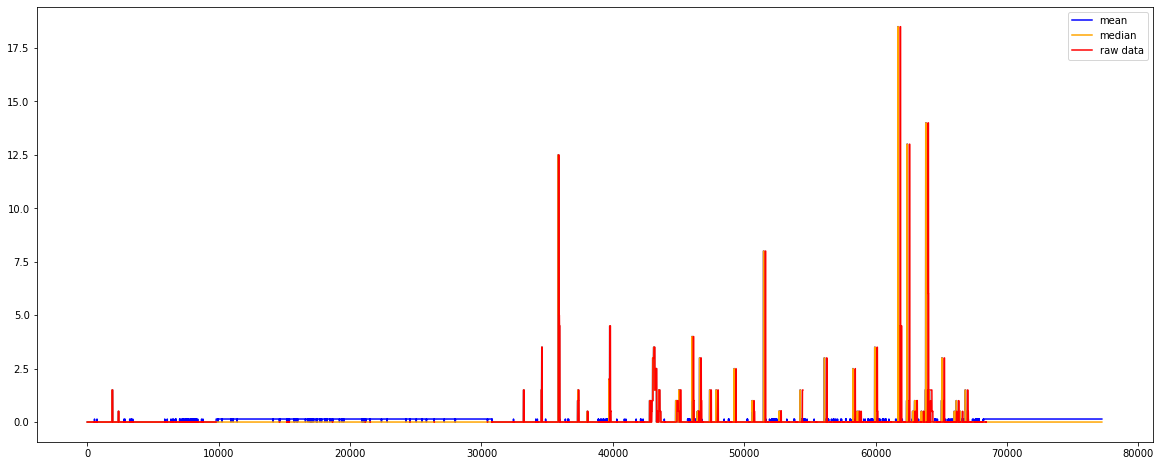

In [42]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mean['precipitation'], color='blue' , label='mean')
chart.plot(df_median['precipitation'], color='orange' , label='median')
chart.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

K-NN Imputation

In [20]:
!!pip3 install missingpy

['Collecting missingpy',
 '  Downloading missingpy-0.2.0-py3-none-any.whl (49 kB)',
 '\x1b[?25l',
 '\x1b[K     |██████▊                         | 10 kB 14.9 MB/s eta 0:00:01',
 '\x1b[K     |█████████████▍                  | 20 kB 14.3 MB/s eta 0:00:01',
 '\x1b[K     |████████████████████            | 30 kB 9.6 MB/s eta 0:00:01',
 '\x1b[K     |██████████████████████████▊     | 40 kB 8.9 MB/s eta 0:00:01',
 '\x1b[K     |████████████████████████████████| 49 kB 2.3 MB/s ',
 '\x1b[?25hInstalling collected packages: missingpy',
 'Successfully installed missingpy-0.2.0']

In [21]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [22]:
from missingpy import KNNImputer
imp_knn = KNNImputer()
df_knn = pd.DataFrame(imp_knn.fit_transform(df_null), columns=df_null.columns)

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


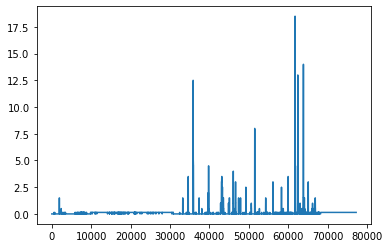

In [23]:
df_knn['precipitation'].plot()

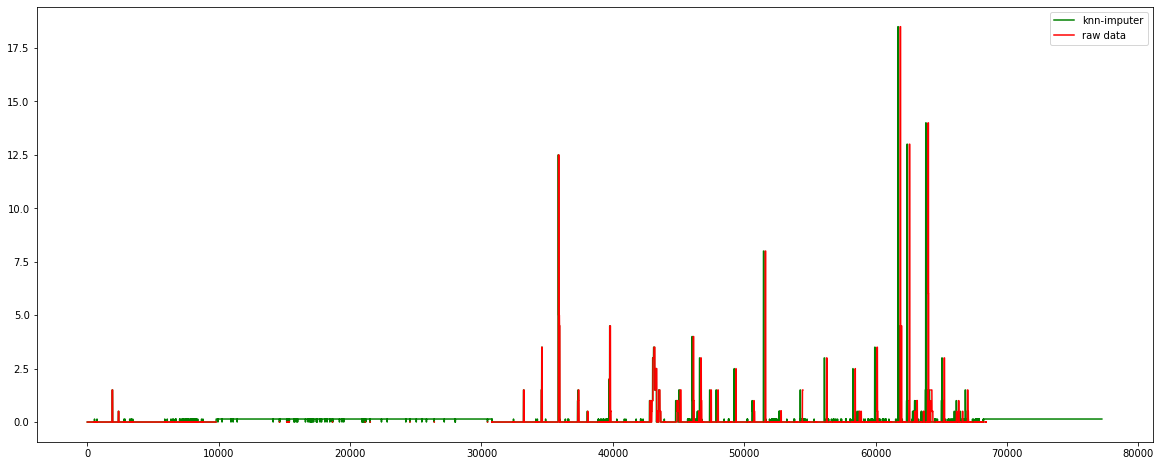

In [43]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_knn['precipitation'], color='green' , label='knn-imputer')
chart.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.legend(loc = 'best')

MissForest Imputation

In [25]:
from missingpy import MissForest
imp_missForest = MissForest()
df_missForest = pd.DataFrame(imp_missForest.fit_transform(df_null), columns=df_null.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 1


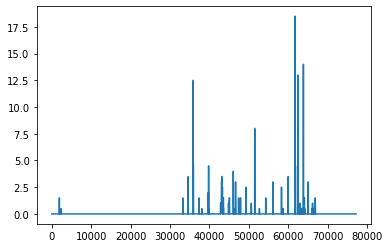

In [26]:
df_missForest['precipitation'].plot()

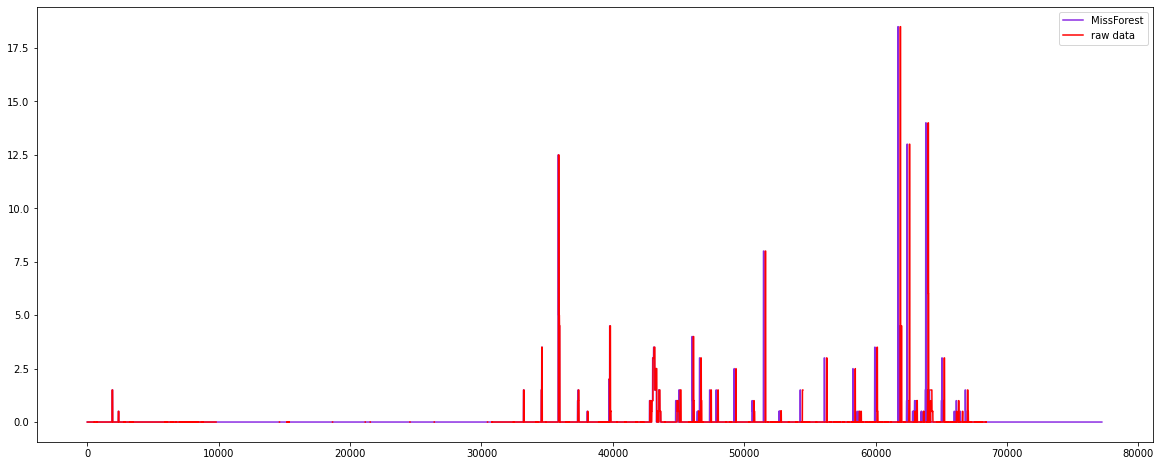

In [45]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_missForest['precipitation'], color='blueviolet' , label='MissForest')
chart.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.legend(loc = 'best')

MICE

In [29]:
!pip3 install impyute

In [30]:
from impyute.imputation.cs import mice
imp_mice = mice(df_null.values) # mice 학습시작
df_mice = pd.DataFrame(imp_mice, columns=df_null.columns)

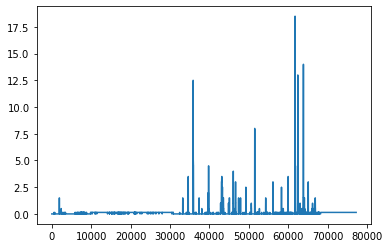

In [31]:
df_mice['precipitation'].plot()

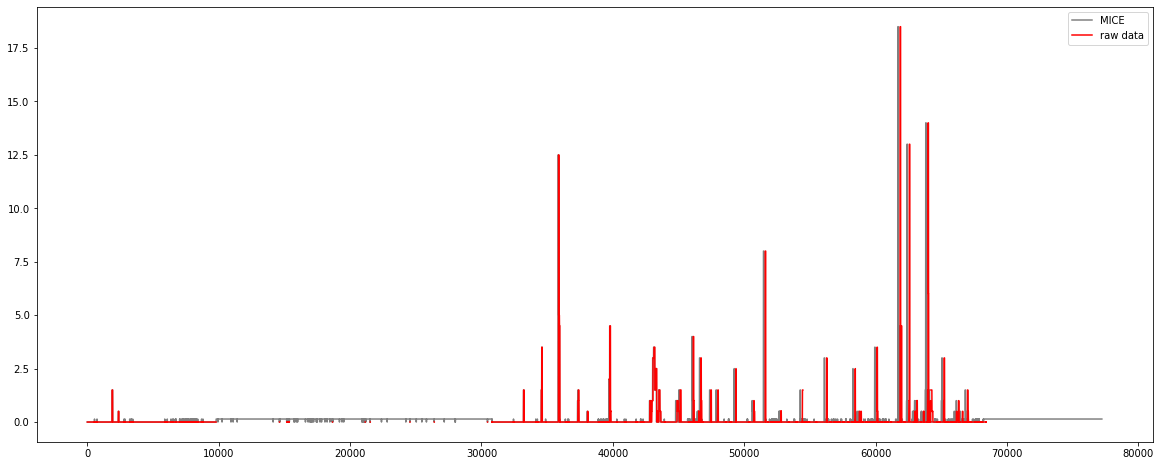

In [46]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mice['precipitation'], color='gray' , label='MICE')
chart.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.legend(loc = 'best')

In [ ]:
null_precip=df_raw_data2.loc[df_raw_data2['precipitation'].isnull()==True]
null_precip.head()

,holiday,weekend,time,precipitation_type,temperature,station_name,filename,precipitation,total_car_num,day_week,humid,year,month,day,hour,minute,second
548,False,False,2020-09-24-07h-45m-52s,NaN,NaN,26,congress_2020-09-24-07h-45m-52s.jpg,NaN,0,thu,NaN,2020,9,24,7,45,52
739,False,False,2020-09-24-23h-26m-00s,NaN,NaN,26,congress_2020-09-24-23h-26m-00s.jpg,NaN,3,thu,NaN,2020,9,24,23,26,0
2795,False,False,2020-10-05-11h-30m-00s,NaN,NaN,26,congress_2020-10-05-11h-30m-00s.jpg,NaN,2,mon,NaN,2020,10,5,11,30,0
2865,False,False,2020-10-05-17h-20m-00s,NaN,NaN,26,congress_2020-10-05-17h-20m-00s.jpg,NaN,4,mon,NaN,2020,10,5,17,20,0
3228,False,False,2020-10-07-13h-35m-00s,NaN,NaN,26,congress_2020-10-07-13h-35m-00s.jpg,NaN,3,wen,NaN,2020,10,7,13,35,0


In [ ]:
null_precip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31099 entries, 548 to 77436
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             31099 non-null  bool   
 1   weekend             31099 non-null  bool   
 2   time                31099 non-null  object 
 3   precipitation_type  0 non-null      float64
 4   temperature         0 non-null      float64
 5   station_name        31099 non-null  int64  
 6   filename            31099 non-null  object 
 7   precipitation       0 non-null      float64
 8   total_car_num       31099 non-null  int64  
 9   day_week            31099 non-null  object 
 10  humid               0 non-null      float64
 11  year                31099 non-null  int64  
 12  month               31099 non-null  int64  
 13  day                 31099 non-null  int64  
 14  hour                31099 non-null  int64  
 15  minute              31099 non-null  int64  
 16  se

In [ ]:
null_precip.groupby('month').size()

month
1      6623
2      4430
3        28
4        75
5       107
6       173
7       152
8        60
9        25
10      835
11     8542
12    10049
dtype: int64

In [ ]:
# df_raw_data.dropna(axis = 0, inplace= True)
# df_raw_data.info()

# df_raw_data.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
# df_raw_data.info()

# df_raw_data.drop('time', axis=1, inplace = True)
# df_raw_data.info()


# df_raw_data['day_week'].replace('mon', 0, inplace = True)
# df_raw_data['day_week'].replace('tue', 1, inplace = True)
# df_raw_data['day_week'].replace('wen', 2, inplace = True)
# df_raw_data['day_week'].replace('thu', 3, inplace = True)
# df_raw_data['day_week'].replace('fri', 4, inplace = True)
# df_raw_data['day_week'].replace('sat', 5, inplace = True)
# df_raw_data['day_week'].replace('sun', 6, inplace = True)

# df_raw_data['holiday'] = df_raw_data['holiday'].astype(int)
# df_raw_data['weekend'] = df_raw_data['weekend'].astype(int)


# df_raw_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 6116
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_name        6109 non-null   int64  
 1   time                6109 non-null   object 
 2   holiday             6109 non-null   bool   
 3   day_week            6109 non-null   object 
 4   weekend             6109 non-null   bool   
 5   temperature         6109 non-null   float64
 6   humid               6109 non-null   float64
 7   precipitation       6109 non-null   float64
 8   precipitation_type  6109 non-null   float64
 9   year                6109 non-null   int64  
 10  month               6109 non-null   int64  
 11  day                 6109 non-null   int64  
 12  hour                6109 non-null   int64  
 13  minute              6109 non-null   int64  
 14  total_car_num       6109 non-null   int64  
dtypes: bool(2), float64(4), int64(7), object(2)
memory usag

,station_name,holiday,day_week,weekend,temperature,humid,precipitation,precipitation_type,year,month,day,hour,minute,total_car_num
0,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,20,2
1,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,38,3
2,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,45,4
3,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,50,4
4,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,55,4


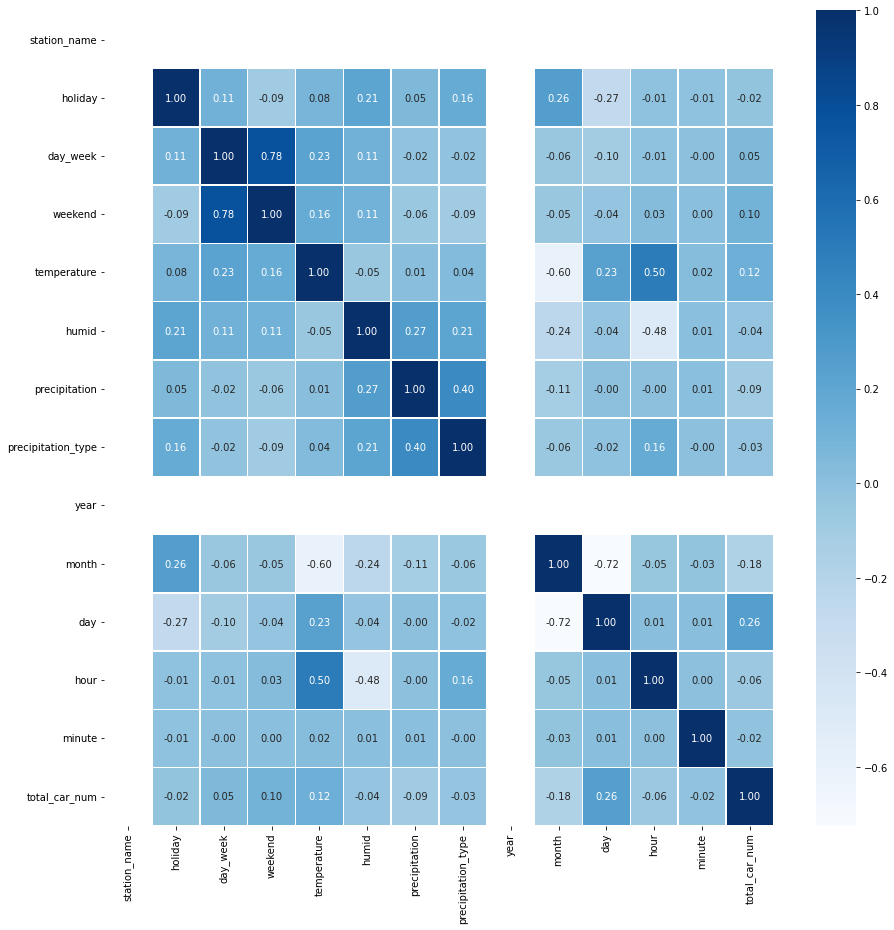

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_raw_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0, 0.5, 'total_car_num')

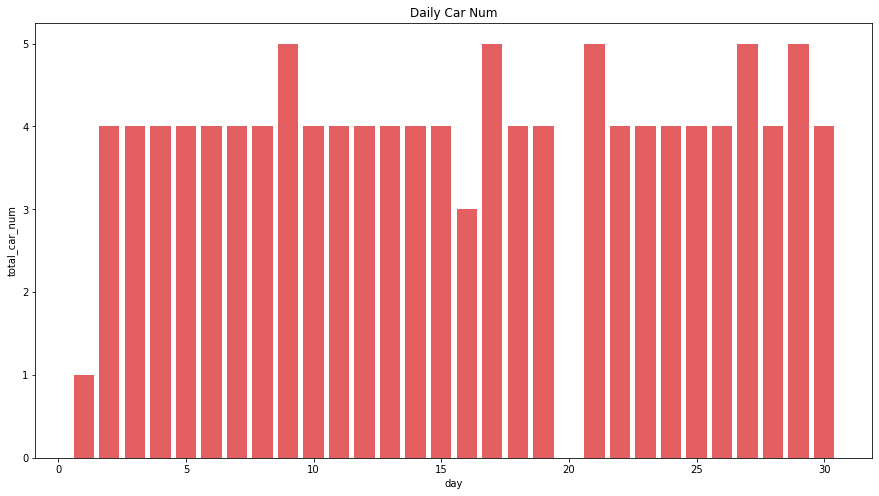

In [ ]:
plt.figure(figsize=(15,8),)
#plt.plot(df_raw_data['day'], df_raw_data['total_car_num'])
plt.bar(df_raw_data['day'], df_raw_data['total_car_num'], color='#e35f62')
plt.title('Daily Car Num')
plt.xlabel('day')
plt.ylabel('total_car_num')

Text(0, 0.5, 'total_car_num')

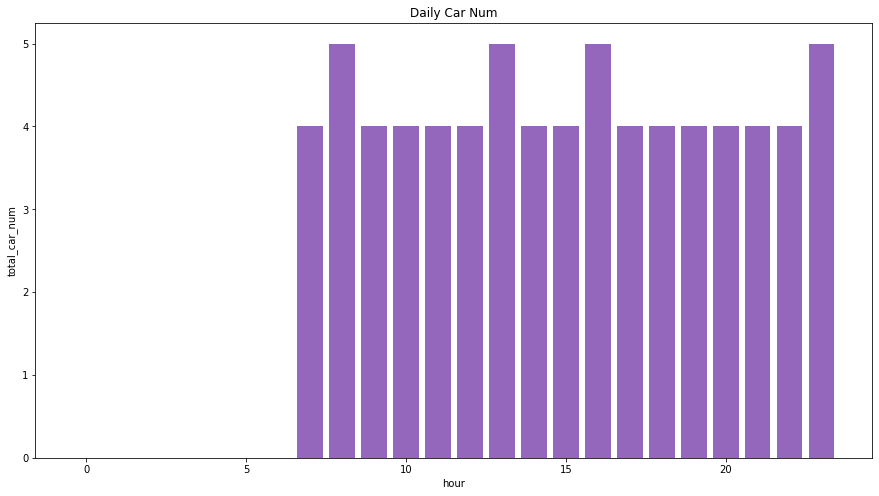

In [ ]:
plt.figure(figsize=(15,8),)
#plt.plot(df_raw_data['day'], df_raw_data['total_car_num'])
plt.bar(df_raw_data['hour'], df_raw_data['total_car_num'], color='#9467bd')
plt.title('Daily Car Num')
plt.xlabel('hour')
plt.ylabel('total_car_num')

In [ ]:
X, y = df_raw_data.iloc[:,2:-1].values, df_raw_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[ 5.   1.  22.  ...  3.  17.  25. ]
 [ 2.   0.  25.  ...  9.  17.  25. ]
 [ 4.   0.  18.2 ...  2.   8.  45. ]
 ...
 [ 2.   0.  14.  ... 14.   9.   5. ]
 [ 3.   0.   8.6 ... 15.  11.  35. ]
 [ 1.   0.  12.  ... 13.   8.   5. ]]
X_test : [[ 3.   0.  22.5 ... 24.  21.  46. ]
 [ 4.   0.  20.3 ...  9.  22.   5. ]
 [ 0.   0.  16.1 ...  5.  15.  15. ]
 ...
 [ 2.   0.  13.2 ... 14.  21.  30. ]
 [ 5.   1.  20.3 ... 10.  18.  50. ]
 [ 5.   1.  19.5 ...  3.  13.  40. ]]
y_train : [3 2 3 ... 3 0 0]
y_test : [4 0 3 ... 2 3 1]


In [ ]:
def plot_error(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, 
           y_train_pred - y_train,
           c= 'steelblue',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Training data')

    plt.scatter(y_test_pred, 
           y_test_pred - y_test,
           c= 'limegreen',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Test data')

    plt.xlabel('Predicted values')
    plt.ylabel('residuals')
    plt.legend(loc = 'upper left')
    plt.hlines(y =0, xmin = 0, xmax = 5, lw = 2, color = 'black')
    plt.xlim ([0, 5])
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_density(y_train, y_test_pred):
    fig,(ax1,ax2)= plt.subplots(ncols=2)
    fig.set_size_inches(12,5)
    sns.distplot(y_train,ax=ax1,bins=10)
    ax1.set(title="train", xlim = ([-1, 6]), ylim = ([0, 0.6]))
    sns.distplot(y_test_pred,ax=ax2,bins=10)
    ax2.set(title="test", xlim = ([-1, 6]), ylim = ([0, 0.6]))

(4886, 11)
(1222, 11)
(4886,)
(1222,)


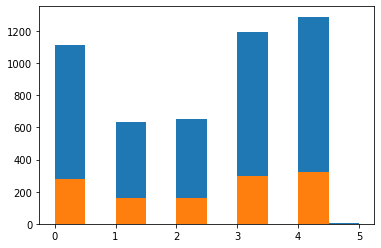

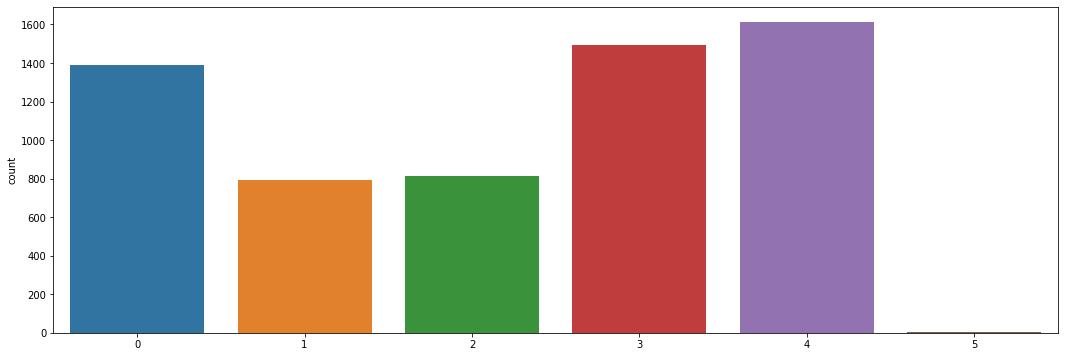

In [ ]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape)

plt.hist(y_train, bins=10)
plt.hist(y_test, bins=10)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)
plt.sca(ax1)
sns.countplot(x = y, ax = ax1)

딥러닝 모델 적용

LSTM 적용

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train_t = X_train.reshape(X_train.shape[0], 11, 1)
X_test_t = X_test.reshape(X_test.shape[0], 11, 1)

print("최종 DATA")
print(X_train_t.shape)

(4886, 11)
(4886,)
(1222, 11)
(1222,)
최종 DATA
(4886, 11, 1)


In [ ]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model 
model_lstm.add(LSTM(50, input_shape=(11, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


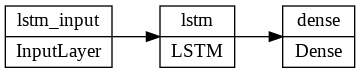

In [ ]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
153/153 [==============================] - 3s 7ms/step - loss: 2.3548
Epoch 2/100
153/153 [==============================] - 1s 7ms/step - loss: 2.2312
Epoch 3/100
153/153 [==============================] - 1s 7ms/step - loss: 2.1972
Epoch 4/100
153/153 [==============================] - 1s 8ms/step - loss: 2.1602
Epoch 5/100
153/153 [==============================] - 1s 8ms/step - loss: 2.1092
Epoch 6/100
153/153 [==============================] - 1s 7ms/step - loss: 2.0150
Epoch 7/100
153/153 [==============================] - 1s 8ms/step - loss: 1.9343
Epoch 8/100
153/153 [==============================] - 1s 7ms/step - loss: 1.8907
Epoch 9/100
153/153 [==============================] - 1s 7ms/step - loss: 1.8404
Epoch 10/100
153/153 [==============================] - 1s 7ms/step - loss: 1.8245
Epoch 11/100
153/153 [==============================] - 1s 7ms/step - loss: 1.7765
Epoch 12/100
153/153 [==============================] - 1s 7ms/step - loss: 1.7464
Epoch 13/100


In [ ]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

39/39 [==============================] - 1s 4ms/step - loss: 1.2568
1.2567776441574097


DNN 적용

In [ ]:
K.clear_session()
    
model_dnn = Sequential() # Sequeatial Model 
model_dnn.add(Dense(20, activation='relu', input_shape=(11, 1)))
model_dnn.add(Dense(10, activation='relu'))
model_dnn.add(Dense(1)) # output = 1 
model_dnn.compile(loss='mean_squared_error', optimizer='adam') 
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11, 20)            40        
                                                                 
 dense_1 (Dense)             (None, 11, 10)            210       
                                                                 
 dense_2 (Dense)             (None, 11, 1)             11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


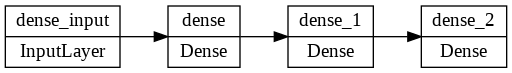

In [ ]:
tf.keras.utils.plot_model(
    model=model_dnn, to_file="dnn_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_dnn.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
153/153 [==============================] - 1s 2ms/step - loss: 849.2267
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 5.5930
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 4.9784
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 4.3851
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 3.8643
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 3.4313
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 3.0931
Epoch 8/100
153/153 [==============================] - 0s 2ms/step - loss: 2.8417
Epoch 9/100
153/153 [==============================] - 0s 2ms/step - loss: 2.6649
Epoch 10/100
153/153 [==============================] - 0s 2ms/step - loss: 2.5517
Epoch 11/100
153/153 [==============================] - 0s 2ms/step - loss: 2.4766
Epoch 12/100
153/153 [==============================] - 0s 2ms/step - loss: 2.4317
Epoch 13/10

In [ ]:
score = model_dnn.evaluate(X_test_t, y_test, batch_size=32)
print(score)

39/39 [==============================] - 1s 3ms/step - loss: 2.3565
2.3565216064453125


GRU 모델 적용

In [ ]:
from keras.layers.recurrent_v2 import GRU
K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(11, 1)))
model_gru.add(Dense(1)) # output = 1 
model_gru.compile(loss='mean_squared_error', optimizer='adam') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


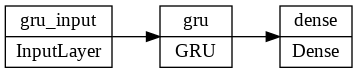

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_gru.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
153/153 [==============================] - 9s 20ms/step - loss: 2.3582
Epoch 2/100
153/153 [==============================] - 3s 19ms/step - loss: 2.1752
Epoch 3/100
153/153 [==============================] - 3s 19ms/step - loss: 2.0035
Epoch 4/100
153/153 [==============================] - 3s 19ms/step - loss: 1.9399
Epoch 5/100
153/153 [==============================] - 2s 15ms/step - loss: 1.8566
Epoch 6/100
153/153 [==============================] - 2s 12ms/step - loss: 1.8357
Epoch 7/100
153/153 [==============================] - 2s 12ms/step - loss: 1.7692
Epoch 8/100
153/153 [==============================] - 2s 12ms/step - loss: 1.6963
Epoch 9/100
153/153 [==============================] - 2s 12ms/step - loss: 1.6709
Epoch 10/100
153/153 [==============================] - 2s 12ms/step - loss: 1.5695
Epoch 11/100
153/153 [==============================] - 2s 12ms/step - loss: 1.5177
Epoch 12/100
153/153 [==============================] - 2s 13ms/step - loss: 1.4207
E

In [ ]:
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print(score)

39/39 [==============================] - 1s 4ms/step - loss: 1.2838
1.283846378326416


Adaboost-GRU 적용

In [ ]:
from keras.layers.recurrent_v2 import GRU
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(11, 1)))
model_gru.add(Dense(1)) # output = 1 
model_gru.compile(loss='mean_squared_error', optimizer='adam') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=20, batch_size=30)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [ ]:
tf.keras.utils.plot_model(
    model=model_adaboostgru, to_file="adaboostgru_model.png", show_shapes=False, rankdir="LR")

AttributeError: ignored

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/20
163/163 [==============================] - 8s 17ms/step - loss: 2.4938
Epoch 2/20
163/163 [==============================] - 2s 11ms/step - loss: 2.2141
Epoch 3/20
163/163 [==============================] - 2s 11ms/step - loss: 2.0998
Epoch 4/20
163/163 [==============================] - 2s 12ms/step - loss: 1.9472
Epoch 5/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8790
Epoch 6/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8372
Epoch 7/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8269
Epoch 8/20
163/163 [==============================] - 2s 12ms/step - loss: 1.8008
Epoch 9/20
163/163 [==============================] - 2s 11ms/step - loss: 1.6986
Epoch 10/20
163/163 [==============================] - 2s 12ms/step - loss: 1.6416
Epoch 11/20
163/163 [==============================] - 2s 12ms/step - loss: 1.5445
Epoch 12/20
163/163 [==============================] - 2s 11ms/step - loss: 1.4268
Epoch 13/20
1

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb175d03550>,
                  n_estimators=5, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

0.5726726461957605


CNN+LSTM 적용

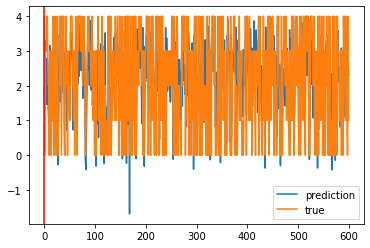

In [ ]:
preds = model.predict(X_test_t)

plt.plot(preds[:600], label='prediction')
plt.plot(y_test[:600], label='true')
plt.axvline(x=len(y_test)-len(preds), color='r')
plt.legend()
plt.show()

Define a DNN model

In [ ]:
import os

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import feature_column as fc



In [ ]:
df_fc = df_raw_data
df_fc.head()

,station_name,holiday,day_week,weekend,temperature,humid,precipitation,precipitation_type,year,month,day,hour,minute,total_car_num
0,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,20,2
1,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,38,3
2,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,45,4
3,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,50,4
4,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,55,4


In [ ]:
df_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6108 entries, 0 to 6116
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_name        6108 non-null   int64  
 1   holiday             6108 non-null   int64  
 2   day_week            6108 non-null   int64  
 3   weekend             6108 non-null   int64  
 4   temperature         6108 non-null   float64
 5   humid               6108 non-null   float64
 6   precipitation       6108 non-null   float64
 7   precipitation_type  6108 non-null   float64
 8   year                6108 non-null   int64  
 9   month               6108 non-null   int64  
 10  day                 6108 non-null   int64  
 11  hour                6108 non-null   int64  
 12  minute              6108 non-null   int64  
 13  total_car_num       6108 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 715.8 KB


In [ ]:
train, test = train_test_split(df_fc, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), '훈련 샘플')
print(len(val), '검증 샘플')
print(len(test), '테스트 샘플')

3908 훈련 샘플
978 검증 샘플
1222 테스트 샘플


In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('total_car_num')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size = len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 10
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
train_ds

<BatchDataset shapes: ({station_name: (None,), holiday: (None,), day_week: (None,), weekend: (None,), temperature: (None,), humid: (None,), precipitation: (None,), precipitation_type: (None,), year: (None,), month: (None,), day: (None,), hour: (None,), minute: (None,)}, (None,)), types: ({station_name: tf.int64, holiday: tf.int64, day_week: tf.int64, weekend: tf.int64, temperature: tf.float64, humid: tf.float64, precipitation: tf.float64, precipitation_type: tf.float64, year: tf.int64, month: tf.int64, day: tf.int64, hour: tf.int64, minute: tf.int64}, tf.int64)>

In [ ]:
for feature_batch, label_batch in train_ds.take(1):
  print("Total feature: ", list(feature_batch.keys()))
  print("Target feature: ", label_batch)

Total feature:  ['station_name', 'holiday', 'day_week', 'weekend', 'temperature', 'humid', 'precipitation', 'precipitation_type', 'year', 'month', 'day', 'hour', 'minute']
Target feature:  tf.Tensor([0 4 4 0 3 2 0 4 0 3], shape=(10,), dtype=int64)


In [ ]:
example_batch = next(iter(train_ds))[0]
feature_batch

{'day': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9, 29,  6,  9,  6, 13,  1, 21,  9, 22])>,
 'day_week': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 1, 1, 2, 1, 6, 3, 0, 2, 1])>,
 'holiday': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])>,
 'hour': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([15, 23, 21, 16, 13, 21,  9, 15, 14, 16])>,
 'humid': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([66., 57., 36., 66., 64., 59., 78., 47., 76., 41.])>,
 'minute': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9, 10, 40, 45, 10, 30,  0, 20, 14, 35])>,
 'month': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9,  9, 10,  9, 10,  9, 10,  9,  9,  9])>,
 'precipitation': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>,
 'precipitation_type': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>,
 'station_name': <tf.Tensor: shape=(10,), dt

In [ ]:
# 특성 열을 만들고 배치 데이터를 변환하는 함수
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(feature_batch).numpy())

In [ ]:
crossed_feature = fc.crossed_column(['day_week', 'hour'], hash_bucket_size=170)
demo(fc.indicator_column(crossed_feature))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
feature_columns = []

for colname in ["station_name", "holiday", "day_week", "weekend", "temperature", "humid", "precipitation", "precipitation_type", "year", "month", "day", "hour", "minute"]:
  feature_columns.append(fc.numeric_column(colname))

crossed_feature  = fc.crossed_column(['day_week', 'hour'], hash_bucket_size=170)
crossed_feature  = fc.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
#DNN
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
117/123 [===========================>..] - ETA: 0s - loss: 3.7184 - accuracy: 0.1335WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'station_name': <tf.Tensor 'IteratorGetNext:9' shape=(None,) dtype=int64>, 'holiday': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=int64>, 'day_week': <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=int64>, 'weekend': <tf.Tensor 'IteratorGetNext:11' shape=(None,) dtype=int64>, 'temperature': <tf.Tensor 'IteratorGetNext:10' shape=(None,) dtype=float64>, 'humid': <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=float64>, 'precipitation': <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=float64>, 'precipitation_type': <tf.Tensor 'IteratorGetNext:8' shape=(None,) dtype=float64>, 'year': <tf.Tensor 'IteratorGetNext:12' shape=(None,) dtype=int64>, 'mont

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("정확도", accuracy)

39/39 [==============================] - 0s 2ms/step - loss: 3.7709 - accuracy: 0.1326
정확도 0.1325695514678955
